### Problem: Can we estimate the price of a used car based on it's characteristics?
#### Usecase
Tom wants to sell his car. He wants to earn as much money from selling the car and a reasonable amount for his buyers that someone actually wants to purchase it. So, the price he set should represent the value of the car. How can we help Tom to determine the best price for his car?

We will use various python packages to perform Data Cleaning, Exploratory Data Analysis, model development and model evaluation. Let's start by looking at the used car prices data.
ref: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/

About the dataset, there is 26 columns and 201 rows.
The column definition are as followed:
symboling: insurance risk level of a car (+3 risky and -3 safe and in between values)
normalized-losses: relative avg loss payment per insured vehicle year
data definition is provied in imports-85.names
Our target value is the column "price" means the value that we want to predict from the dataset is price and the predictors should be all other variables listed. (The dataset is actually from 1985 so the car prices may seem very low. from the current economy. We can still use the dataset for excersizing data analysis.)

#### Goal: Predict the price of the car based on other car features (predictors)

## Project Goal: The goal of this file is to start the data wrangling process to ensure the data is ready for further analysis.

## 1. Importing libraries

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [160]:
df= pd.read_csv("automobiles.csv")
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470


In [161]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

### Data wrangling, applying normalization to length,width and height column
Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1

Example

To demonstrate normalization, let's say we want to scale the columns "length", "width" and "height"

Target:would like to Normalize those variables so their value ranges from 0 to 1.

Approach: replace original value by (original value)/(maximum value)

In [162]:
df["length"] = df["length"]/df["length"].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

In [163]:
df[["length","height","width"]]

,length,height,width
0,0.811148,0.816054,0.890278
1,0.811148,0.816054,0.890278
2,0.822681,0.876254,0.909722
3,0.848630,0.908027,0.919444
4,0.848630,0.908027,0.922222
...,...,...,...
196,0.907256,0.928094,0.956944
197,0.907256,0.928094,0.955556
198,0.907256,0.928094,0.956944
199,0.907256,0.928094,0.956944


### Binning to the horsepower column
Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.

Example:

In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it has 57 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis?

We will use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins

#### Lets plot the histogram of horspower, to see what the distribution of horsepower looks like

Text(0.5, 1.0, 'horsepower bins')

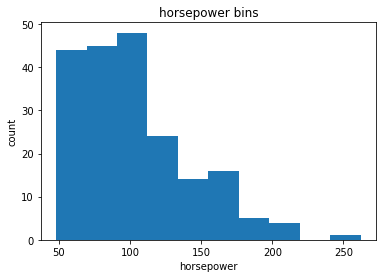

In [164]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

We would like 3 bins of equal size bandwidth so we use numpy's linspace(start_value, end_value, numbers_generated function.

Since we want to include the minimum value of horsepower we want to set start_value=min(df["horsepower"]).

Since we want to include the maximum value of horsepower we want to set end_value=max(df["horsepower"]).

Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated=4.

We build a bin array, with a minimum value to a maximum value, with bandwidth calculated above. The bins will be values used to determine when one bin ends and another begins.

In [165]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [166]:
group_names = ['Low', 'Medium', 'High']

We apply the function "cut" the determine what each value of "df['horsepower']" belongs to.

In [167]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111.0,Low
1,111.0,Low
2,154.0,Medium
3,102.0,Low
4,115.0,Low
5,110.0,Low
6,110.0,Low
7,110.0,Low
8,140.0,Medium
9,101.0,Low


In [168]:
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

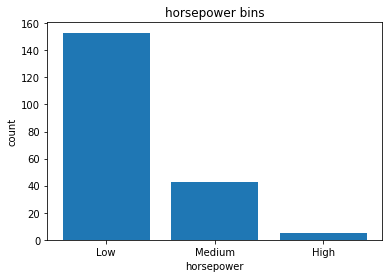

In [169]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

### Bins visualization
Normally, a histogram is used to visualize the distribution of bins we created above.

Text(0.5, 1.0, 'horsepower bins')

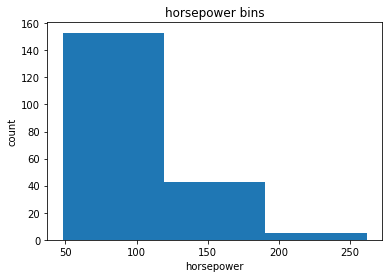

In [170]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

### Binning to the price column

Text(0.5, 1.0, 'price bins')

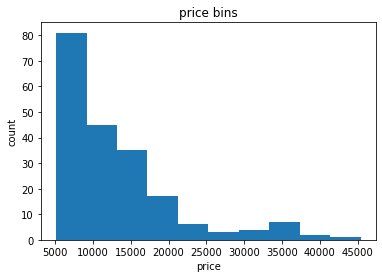

In [171]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["price"])

# set x/y labels and plot title
plt.pyplot.xlabel("price")
plt.pyplot.ylabel("count")
plt.pyplot.title("price bins")

In [172]:
bins= np.linspace(min(df["price"]),max(df["price"]),4)
group_names=["Low","Medium","High"]
df["price-binned"]=pd.cut(df["price"],bins,labels=group_names,include_lowest=True)
bins

array([ 5118.        , 18545.33333333, 31972.66666667, 45400.        ])

In [173]:
df[['price','price-binned']].head(20)

,price,price-binned
0,13495,Low
1,16500,Low
2,16500,Low
3,13950,Low
4,17450,Low
5,15250,Low
6,17710,Low
7,18920,Medium
8,23875,Medium
9,16430,Low


In [174]:
df["price-binned"].value_counts()

Low       171
Medium     18
High       12
Name: price-binned, dtype: int64

Text(0.5, 1.0, 'price bins')

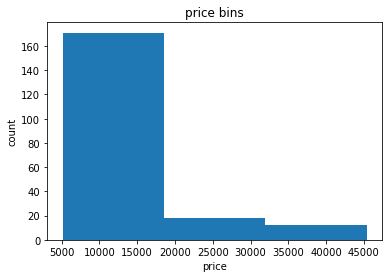

In [175]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["price"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("price")
plt.pyplot.ylabel("count")
plt.pyplot.title("price bins")

### Standardization of highway-mpg and city-mpg
Standardization is the process of transforming data into a common format which allows the researcher to make the meaningful comparison.

Example

Transform mpg to L/100km:

In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accept the fuel consumption with L/100km standard

In [176]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]
df['highway-L/100km'] = 235/df["highway-mpg"]
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,price-binned,city-L/100km,highway-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,13495,Low,Low,11.190476,8.703704
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,16500,Low,Low,11.190476,8.703704
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,9.0,154.0,5000.0,19,26,16500,Medium,Low,12.368421,9.038462
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,10.0,102.0,5500.0,24,30,13950,Low,Low,9.791667,7.833333
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,8.0,115.0,5500.0,18,22,17450,Low,Low,13.055556,10.681818


### Use of Indicator variable
An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.

Why we use indicator variables?

So we can use categorical variables for regression analysis in the later modules.

Example
We see the column "fuel-type" has two unique values, "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" into indicator variables.

We will use the panda's method 'get_dummies' to assign numerical values to different categories of fuel type.
Get indicator variables and assign it to data frame "dummy_variable_1"

In [177]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


We now have the value 0 to represent "gas" and 1 to represent "diesel" in the column "fuel-type". We will now insert this column back into our original dataset.

In [178]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [179]:
df["gas"].dtypes

dtype('uint8')

# Create indicator variable to the column of "aspiration": "std" to 1, while "turbo" to 0.

In [180]:
aspiration_dummy = pd.get_dummies(df["aspiration"])
#aspiration_dummy = aspiration_dummy.rename(columns={"std": "aspiration_std", "turbo": "aspiration_turbo"})
df = pd.concat([df, aspiration_dummy], axis=1)

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
196,1,0
197,0,1
198,1,0
199,0,1


In [181]:
df.drop('aspiration', axis = 1, inplace=True)

In [182]:
df

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,highway-mpg,price,horsepower-binned,price-binned,city-L/100km,highway-L/100km,diesel,gas,std,turbo
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,27,13495,Low,Low,11.190476,8.703704,0,1,1,0
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,27,16500,Low,Low,11.190476,8.703704,0,1,1,0
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,26,16500,Medium,Low,12.368421,9.038462,0,1,1,0
3,2,164.0,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,30,13950,Low,Low,9.791667,7.833333,0,1,1,0
4,2,164.0,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,22,17450,Low,Low,13.055556,10.681818,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,28,16845,Low,Low,10.217391,8.392857,0,1,1,0
197,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.955556,...,25,19045,Medium,Medium,12.368421,9.400000,0,1,0,1
198,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,23,21485,Medium,Medium,13.055556,10.217391,0,1,1,0
199,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,27,22470,Low,Medium,9.038462,8.703704,1,0,0,1


### Writing the clean data to automobiles.csv

In [183]:
df.to_csv("automobiles.csv", header=True,index=False) #after data wrangling